### **DaemonSet이란?**

* 데몬셋은 클러스터 전체 노드에 특정 파드를 실행할 때 사용하는 컨트롤러.
* 클러스터 안에 새롭게 노드가 추가되었을 때 데몬셋이 자동으로 해당 노드에 파드를 실행
* 반대로 노드가 클러스터에서 빠졌을 때는 해당 노드에 있던 파드는 그대로 사라질 뿐 다른 곳으로 옮겨가서 실행되지는 않는다.



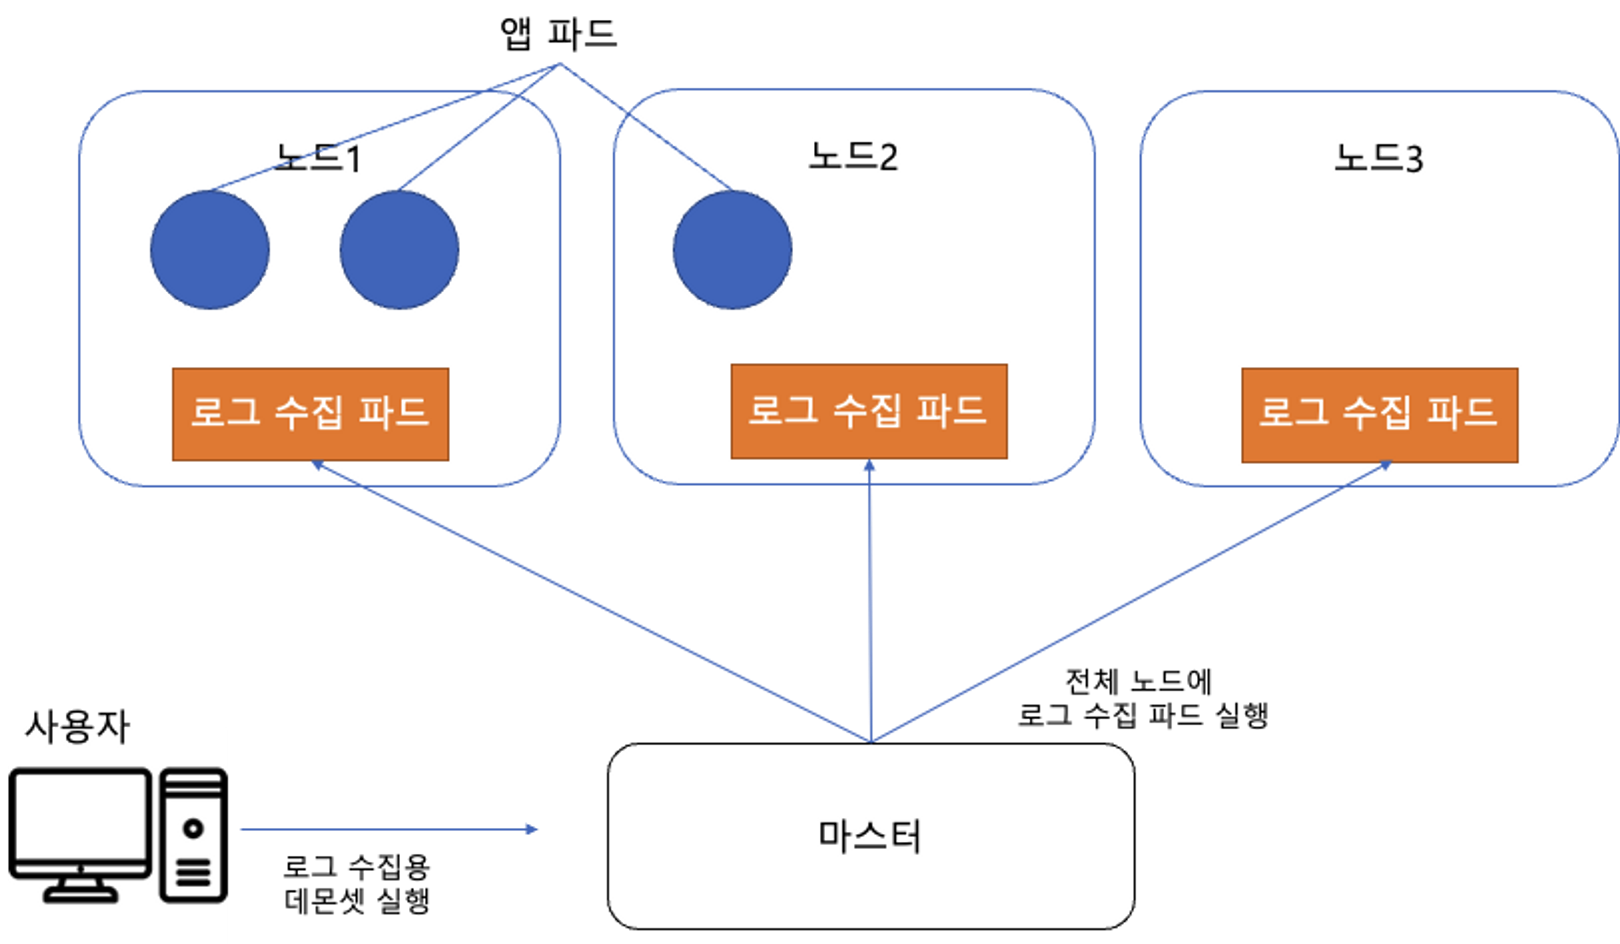



* 데몬셋은 보통 로그 수집기를 실행하거나 노드를 모니터링하는 데몬 등 클러스터 전체에 항상 실행해두어야 하는 파드에 사용된다.

### DaemonSet 생성하기

fluentd.daemonset.yaml이라는 파일을 생성하고 다음 코드를 입력.

```yaml
apiVersion: apps/v1
kind: DaemonSet
metadata:
  name: fluentd
  namespace: kube-system
  labels:
    k8s-app: fluentd
spec:
  selector:
    matchLabels:
      name: fluentd
  template:
    metadata:
      labels:
        name: fluentd
    spec:
      containers:
      - name: fluentd
        image: fluentd:latest
```

파일 작성이 끝났다면 다음 명령어로 실행 및 확인을 진행해준다.

```yaml
kubectl apply -f fluentd.daemonset.yaml

kubectl get pods -n kube-system
```

**Daemonset 확인**

```yaml
kubectl get daemonsets.apps -n kube-system
```

**Daemonset을 통해 생성된 pod 확인하기**

```yaml
kubectl get pods -n kube-system
```


****HostPort 활용****

fluend.daemonset.hostport.yaml을 작성한다.

```yaml
apiVersion: apps/v1
kind: DaemonSet
metadata:
  name: daemonset-1
spec:
  selector:
    matchLabels:
      type: app
  template:
    metadata:
      labels:
        type: app
    spec:
      containers:
        - name: container
          image: kubetm/app:v1
          ports:
            - containerPort: 8080
              hostPort: 18080
```


**daemonset doneselector 활용**

```yaml
apiVersion: apps/v1
kind: DaemonSet
metadata:
  name: daemonset-2
spec:
  selector:
    matchLabels:
      type: app
  template:
    metadata:
      labels:
        type: app
    spec:
      nodeSelector:
        os: centos
      containers:
        - name: container
          image: kubetm/app:v1
          ports:
            - containerPort: 8080
```



**node 한개에만 적용**



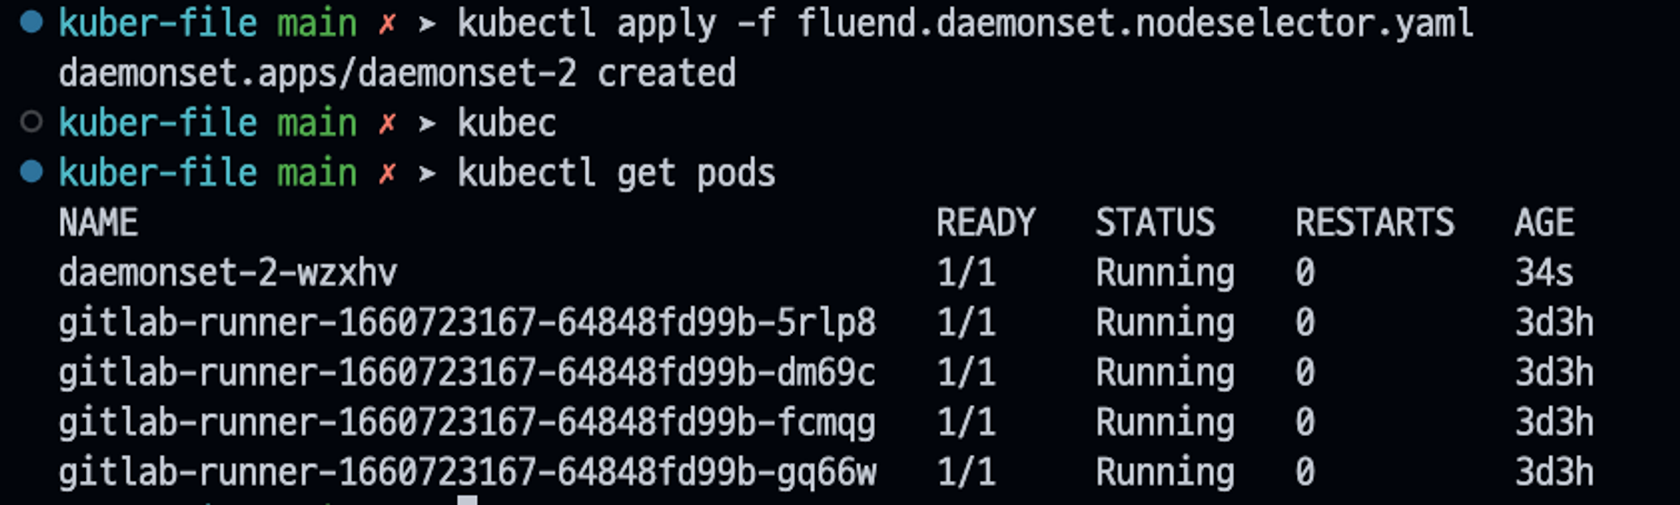

**label을 다른 노드에 추가해서 두 개로 변경**

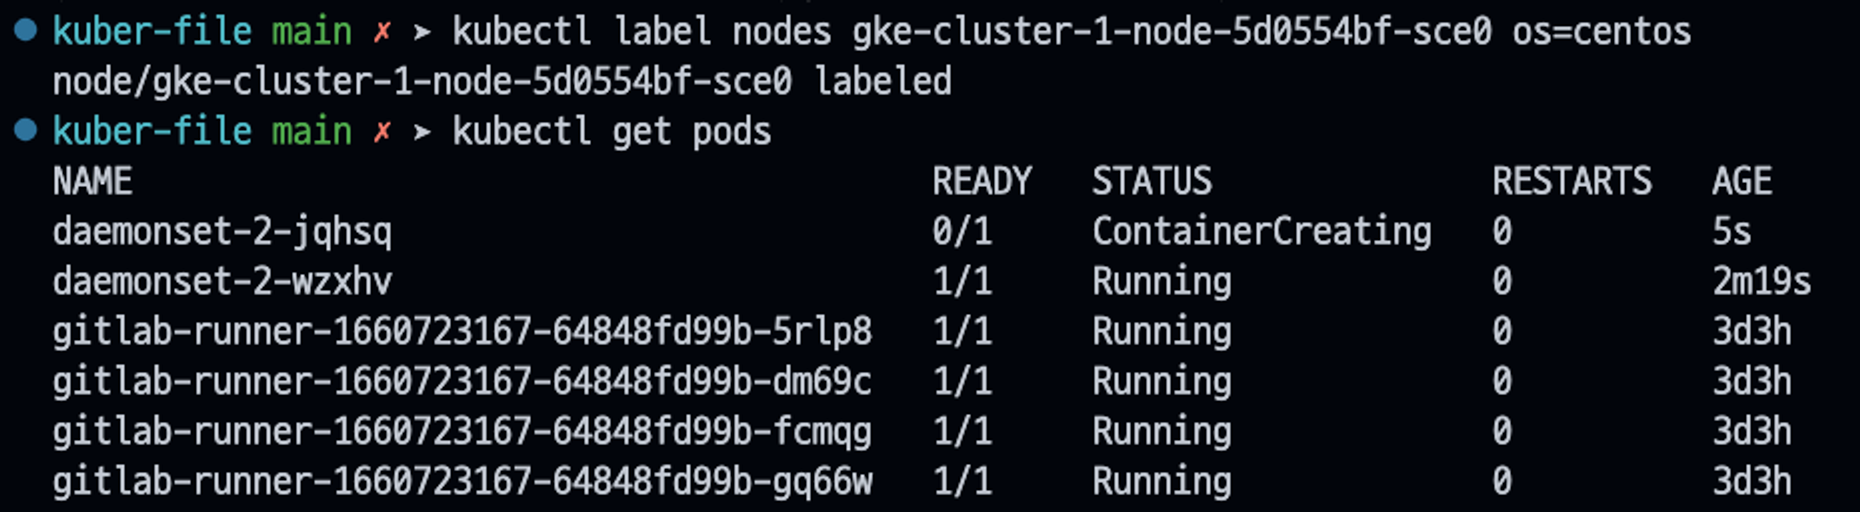
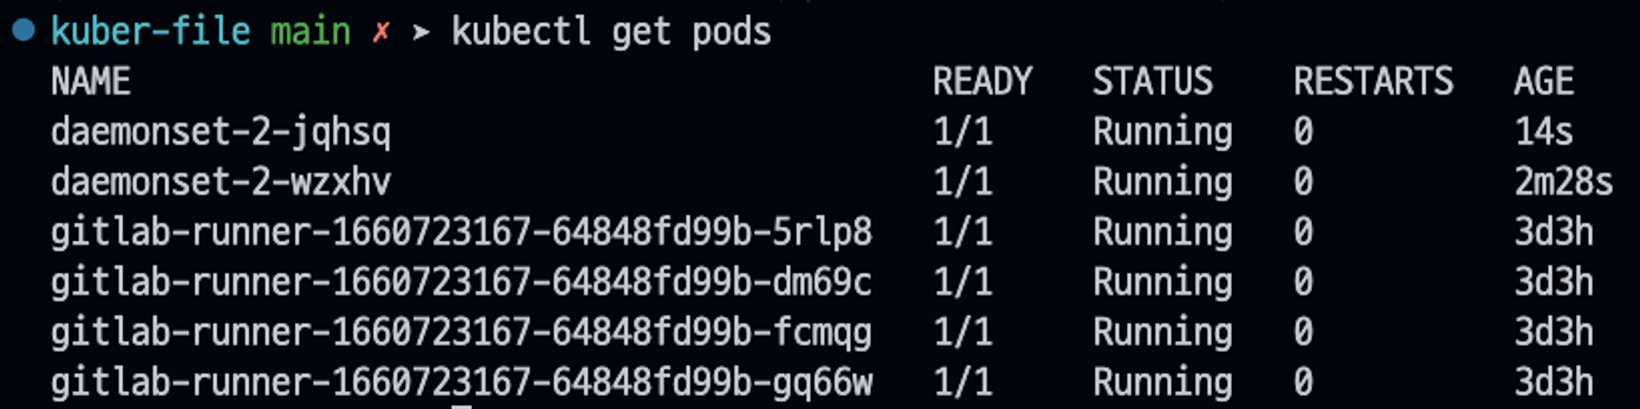